# Phase 1: Planning 

## SWOT Analysis


**Strengths**
- Skills in Python and Public Tableau for data analysis
- Ability to clean and analyze structured datasets
- Knowledge of data visualization

**Weaknesses**
- No exposure to advanced statistical models or ML
- Need for more practice in writing efficient SQL queries

**Opportunities**
- Data-driven decision-making is in high demand across industries
- Public datasets available for real-world (government data)

**Threats**
- Incomplete or inconsistent data
- Interpreting results incorrectly due to lack of domain knowledge

## Project Proposal


**Project Objective**
- *This project aims to analyze unemployment annual trends for counties and cities using Python and Public Tableau.*

**Scope & Timeline**
- Define data sources:
  - CSV files: laborforceandunemployment_annual_2025421
      - https://catalog.data.gov/dataset/local-area-unemployment-statistics-laus-annual-average
- *State of California Unemployment data will be imported from a CSV file, cleaned and analyzed with Python and Public Tableau visualizations.*

**Timeline**
- Week 1: Planning and defining project scope
- Week 2: Data collection and preprocessing
- Week 3: Data analysis using Python
- Week 4: Creating visual reports in Public Tableau
- Week 5: Final improvements and project documentation

**Expected Outcome**
- *A Public Tableau dashboard displaying key Unemployment trends, by Counties and Cities over time.*

**Risks & Mitigation Strategies**
- *If the dataset contains missing values, they will be handled using interpolation or removal techniques. If data is inconsistent, data cleaning will be performed using Python’s pandas library.*

# Phase 2: Analysis


## Section 1. System Requirements
- **Input:**
    - https://data.ca.gov/dataset/74b655ae-6158-41ab-81ef-a02984a17cc1/resource/0d49b0b6-a012-4041-82cb-acebd0d3e8b4/download/laborforceandunemployment_annual_2025421.csv
    - CSV
    - Ensure each county and city has correct name and numeric value
- **Processing:**
    - Data cleaned using Python Pandas library to search for missing values, incorrect names, and dates
    - Data transformed with Python Pandas to ensure all data inputs ready for Public Tableau  
    - Data analyzed within Public Tableau and via dashboard
- **Output:**
    - Public Tableau visualizing Exploratory Data Analysis and Dashboard for Descriptive Analysis on County and City Unemployment Trends in the state of California from 1990 to 2025.

## Section 2. Development Methodology Justification
- **Methodology:** CRISP-DM
- **Justification:** The CRISP-DM (Cross-Industry Standard Process for Data Mining) framework is the "gold standard" for structuring data projects and particularly effective for guiding a thorough Exploratory Data Analysis (EDA).
- **Key Milestones and roles:**
  - *KM 1: Business Understanding:* EDA: Local Area Unemployment Statistics (LAUS)
      - Define Objectives: The primary goal of this analysis is to explore the economic health of various regions (counties, cities, and MSAs) in California by analyzing annual unemployment trends from 1990 to the present.
      - Assess Situation:
          - Trend Analysis: How has the average unemployment rate changed in California over the last 30 years
          - Regional Comparison: Which counties currently have the highest and lowest unemployment rates?
          - Volatility: Which areas experienced the most significant spikes during economic downturns (e.g., 2008 recession or 2020 pandemic)?
      - Identify Success Criteria:
          - A successful EDA will identify the top 5 most stable and top 5 most volatile regions in terms of employment and provide a clear visualization of California's historical unemployment cycles.
  - *KM 2: Data Understanding:* Core of the EDA process.
      - KM 2.1 Initial Data Collection: Load dataset (CSV) and necessary libraries.
      - KM 2.2 Describe Data: Check the shape (rows/columns) and data types (numeric vs. categorical).
      - KM 2.3 Univariate Analysis: Look at distributions (histograms, box plots), specifically the Unemployment Rate.
      - KM 2.4 Bivariate Analysis: Look for relationships/correlations (scatter plots, heatmaps), specifically Time vs Rate or Area vs Rate.
      - KM 2.5 Verify Quality: Identify missing values, duplicates, and outliers to inform Phase 3 (Preparation).
  - *KM 3: Data Preparation*
      - Focus on County-Level Data
      - Apply Logical Filters
      - Handle Missing Values
      - Feature Engineering: Precision Recalculation
      - Final Formatting
  - *KM 4: Modeling*
      - Prepare the Data
      - Train/Test Split (80% Training, 20% Testing)
      - Model Initialization and Training
      - Prediction and Evaluation
      - Visualizing the Prediction "Trend Line"
  - *KM 5: Evaluation*
      - Calculate Residuals (Actual value - Predicted value)
      - Visualization: Residual Plot
      - Final Evaluation Summary for the Report
  - *KM 6: Deployment*
      - Model Persistence (Saving the 'Brain' of the system)
      - Final Data Export for Dashboards
      - Generate Tableau visual


### KM 2.1 Initial Data Collection
Load the dataset and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# CRISP-DM Global Formatting
# Sets decimals to 2 places and adds commas for readability (fixing scientific notation)
pd.options.display.float_format = '{:,.2f}'.format

# Define the relative path to the data folder
file_path = os.path.join("data", "laborforceandunemployment_annual_2025421.csv")

try:
    df = pd.read_csv(file_path)
    print("✅ CRISP-DM Milestone: Data Collection Complete, dataset loaded successfully!")
    print(f"Total Records: {len(df)}")
except FileNotFoundError:
    print("❌ Error: File not found. Ensure the 'data' folder contains the CSV.")

✅ CRISP-DM Milestone: Data Collection Complete, dataset loaded successfully!
Total Records: 17048


### KM 2.2 Describe Data
We audit the "shape" and types to distinguish between categorical labels and numeric labor metrics.

In [2]:
# Check shape (Rows, Columns)
print(f"Dataset Dimensions: {df.shape}") # (17048, 10)

# Inspect data types and column names
print("\n--- Column Schema ---")
df.info()

# Summary statistics for numeric variables
print("\n--- Statistical Summary ---")
display(df.describe()) # Note the 0.00 min and 100.00 max

print("\n--- Statistical Summary (but with Transposed view)---")
display(df.describe().T) # Note the 0.00 min and 100.00 max

# Summary statistics for numeric variables
print("\n--- Table Detail Preview (first 5 rows only) ---")
display(df.head()) 

# Values in Columns
df['Area Name']

df['Area Type']

Dataset Dimensions: (17048, 10)

--- Column Schema ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area Name                 17048 non-null  object 
 1   Area Type                 17048 non-null  object 
 2   Year                      17048 non-null  int64  
 3   Month                     17048 non-null  object 
 4   Seasonally Adjusted(Y/N)  17048 non-null  object 
 5   Status                    17048 non-null  object 
 6   Labor Force               17048 non-null  int64  
 7   Employment                17048 non-null  int64  
 8   Unemployment              17048 non-null  int64  
 9   Unemployment Rate         17048 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3+ MB

--- Statistical Summary ---


,Year,Labor Force,Employment,Unemployment,Unemployment Rate
count,"17,048.00","17,048.00","17,048.00","17,048.00","17,048.00"
mean,"2,015.22","123,095.51","114,466.44","8,627.93",8.38
std,6.94,"878,132.23","817,057.04","64,863.31",7.20
min,"1,990.00",0.00,0.00,0.00,0.00
25%,"2,012.00","1,437.50","1,300.00",100.00,4.10
50%,"2,016.00","7,175.00","6,600.00",500.00,6.70
75%,"2,020.00","33,425.00","31,200.00","2,300.00",10.70
max,"2,024.00","19,644,100.00","18,621,900.00","2,267,400.00",100.00



--- Statistical Summary (but with Transposed view)---


,count,mean,std,min,25%,50%,75%,max
Year,"17,048.00","2,015.22",6.94,"1,990.00","2,012.00","2,016.00","2,020.00","2,024.00"
Labor Force,"17,048.00","123,095.51","878,132.23",0.00,"1,437.50","7,175.00","33,425.00","19,644,100.00"
Employment,"17,048.00","114,466.44","817,057.04",0.00,"1,300.00","6,600.00","31,200.00","18,621,900.00"
Unemployment,"17,048.00","8,627.93","64,863.31",0.00,100.00,500.00,"2,300.00","2,267,400.00"
Unemployment Rate,"17,048.00",8.38,7.20,0.00,4.10,6.70,10.70,100.00



--- Table Detail Preview (first 5 rows only) ---


,Area Name,Area Type,Year,Month,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate
0,California,State,1990,Annual,N,Final,15176300,14301800,874500,5.80
1,Los Angeles-Long Beach-Glendale MD,Metropolitan Area,1990,Annual,N,Final,4526600,4260700,265800,5.90
2,Los Angeles County,County,1990,Annual,N,Final,4526600,4260700,265800,5.90
3,Alameda County,County,1990,Annual,N,Final,678000,650600,27500,4.00
4,Alpine County,County,1990,Annual,N,Final,380,340,40,9.60


0                    State
1        Metropolitan Area
2                   County
3                   County
4                   County
               ...        
17043     Sub-County Place
17044     Sub-County Place
17045     Sub-County Place
17046     Sub-County Place
17047               County
Name: Area Type, Length: 17048, dtype: object

### KM 2.3 Univariate Analysis
We visualize the distribution of the <b>Unemployment Rate</b> to see the "spread" of the data before cleaning.

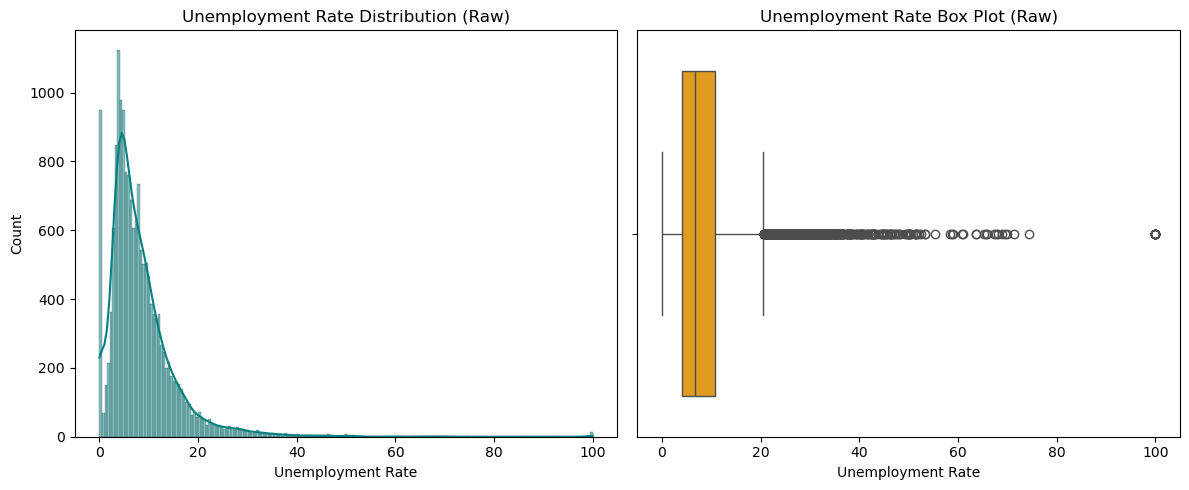

In [3]:
plt.figure(figsize=(12, 5))

# Histogram: Distribution of the Unemployment Rate
plt.subplot(1, 2, 1)
sns.histplot(df['Unemployment Rate'], kde=True, color='teal')
plt.title('Unemployment Rate Distribution (Raw)')

# Box Plot: Identifying the extreme outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Unemployment Rate'], color='orange')
plt.title('Unemployment Rate Box Plot (Raw)')

plt.tight_layout()
plt.show()

### KM 2.4 Bivariate Analysis
Exploring how variables interact.   
We will visualize the statewide trend over time and then contrast the Top 10 vs. Bottom 10 counties to show regional variance.

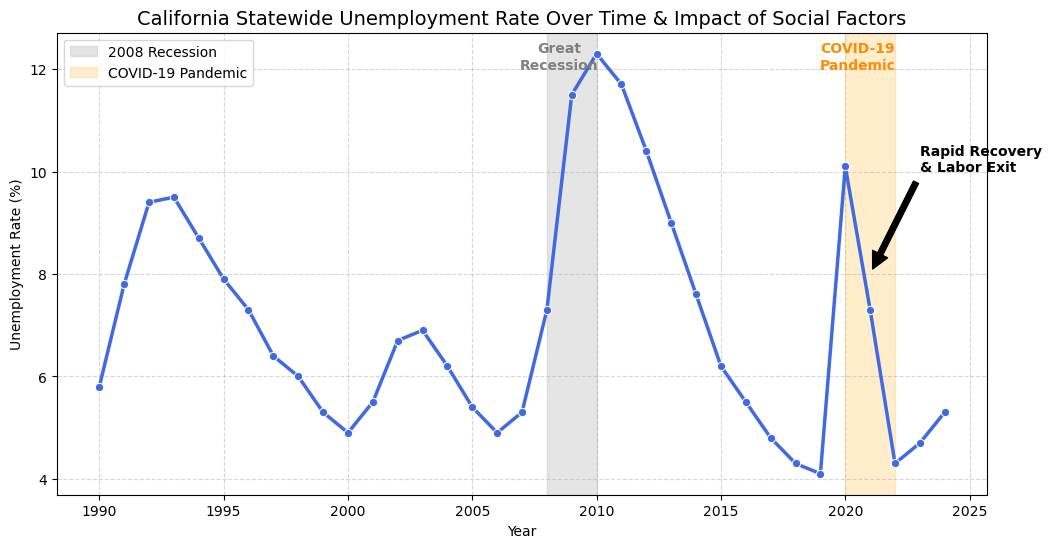

In [4]:
# 1. Relationship: Time (Year) vs. Rate (Statewide)
ca_state = df[df['Area Type'] == 'State'].sort_values('Year')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=ca_state, x='Year', y='Unemployment Rate', marker='o', color='royalblue', linewidth=2.5)

# --- Add Shading for Economic Events ---

# Great Recession (2008 - 2010 peak impact)
plt.axvspan(2008, 2010, color='gray', alpha=0.2, label='2008 Recession')

# COVID-19 Pandemic (2020 - 2022)
plt.axvspan(2020, 2022, color='orange', alpha=0.2, label='COVID-19 Pandemic')

# Annotating the 'Recovery' drop
plt.annotate('Rapid Recovery\n& Labor Exit', xy=(2021, 8), xytext=(2023, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, fontweight='bold')



# --- Add Text Annotations for Clarity ---
plt.text(2008.5, 12, 'Great\nRecession', fontsize=10, fontweight='bold', color='gray', ha='center')
plt.text(2020.5, 12, 'COVID-19\nPandemic', fontsize=10, fontweight='bold', color='darkorange', ha='center')

plt.title('California Statewide Unemployment Rate Over Time & Impact of Social Factors', fontsize=14)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

#### Socioeconomic Context: Understanding the Pandemic Pivot
The visual evidence in the preceding charts highlights a historic spike in 2020 followed by a statistically rapid decline. This "recovery" phase is multifaceted and is driven by three primary structural factors:

1. **The "K-Shaped" Recovery**
   * The 2020 labor shock was asymmetrical; while **hospitality and tourism** faced prolonged stagnation, **tech and professional services** transitioned to remote work environments immediately. This divergence prevented a systemic collapse of the broader labor market.
   * *Reference:* [U.S. Bureau of Labor Statistics: Impact of the COVID-19 pandemic on the labor market](https://www.bls.gov/opub/mlr/2021/article/the-impact-of-the-covid-19-pandemic-on-the-labor-market.htm)

2. **Labor Force Participation (The "Hidden" Factor)**
   * A critical nuance in labor economics is that the **Unemployment Rate** only accounts for individuals actively seeking employment. During the pandemic, a significant portion of the population "exited" the labor force due to childcare school closures, health risks, and the "Great Resignation" (early retirement).
   * *Reference:* [California EDD: Understanding Labor Force Participation Rates](https://labormarketinfo.edd.ca.gov/data/labor-force-participation-rate.html)

3. **Federal and State Intervention**
   * Aggressive fiscal policies, notably the **Paycheck Protection Program (PPP)**, were engineered to maintain employee-employer relationships. By incentivizing businesses to keep staff on payrolls during lockdowns, these programs provided an artificial "floor" for employment figures.
   * *Reference:* [U.S. Department of the Treasury: Paycheck Protection Program Impact](https://home.treasury.gov/policy-issues/coronavirus/assistance-for-small-businesses/paycheck-protection-program)

---

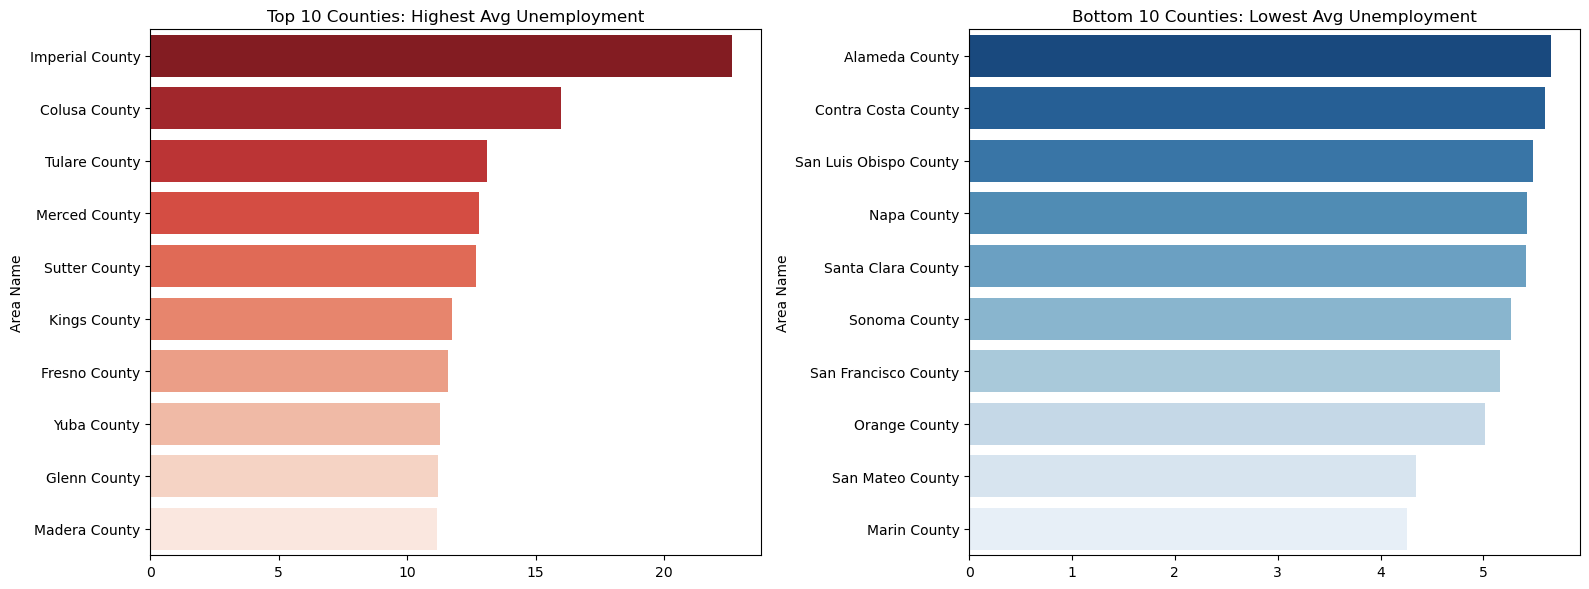

In [5]:
# 2. Relationship: Area (County) vs. Rate (Categorical vs. Numeric)
county_data = df[df['Area Type'] == 'County'].copy()
county_avg = county_data.groupby('Area Name')['Unemployment Rate'].mean().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Highest
sns.barplot(x=county_avg.head(10).values, y=county_avg.head(10).index, 
            hue=county_avg.head(10).index, palette='Reds_r', ax=ax1, legend=False)
ax1.set_title('Top 10 Counties: Highest Avg Unemployment')

# Bottom 10 Lowest
sns.barplot(x=county_avg.tail(10).values, y=county_avg.tail(10).index, 
            hue=county_avg.tail(10).index, palette='Blues_r', ax=ax2, legend=False)
ax2.set_title('Bottom 10 Counties: Lowest Avg Unemployment')

plt.tight_layout()
plt.show()

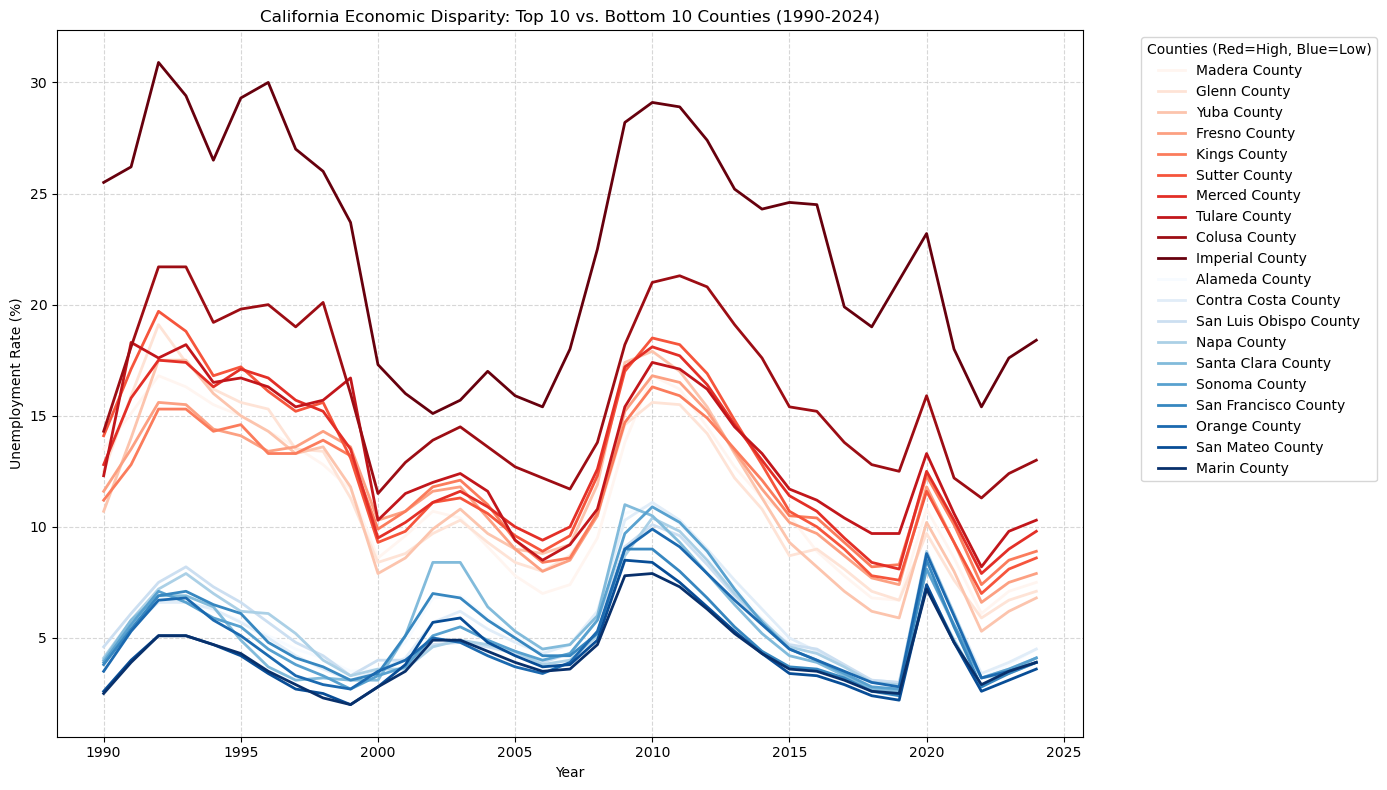

In [6]:
# 1. Identify Top and Bottom Counties
county_only = df[df['Area Type'] == 'County']
county_avg = county_only.groupby('Area Name')['Unemployment Rate'].mean().sort_values(ascending=False)

top_10_names = county_avg.head(10).index.tolist()
bot_10_names = county_avg.tail(10).index.tolist()

# 2. Filter and Pivot the data
# We combine both lists to filter the dataframe
combined_names = top_10_names + bot_10_names
combined_df = county_only[county_only['Area Name'].isin(combined_names)]

# Pivot: Rows=Year, Columns=Area Name, Values=Rate
combined_pivot = combined_df.pivot(index='Year', columns='Area Name', values='Unemployment Rate')

# 3. Create the Combined Line Chart
plt.figure(figsize=(14, 8))

# Plot the Top 10 using the Reds colormap
# We plot them first so they appear in the legend first
combined_pivot[top_10_names[::-1]].plot(ax=plt.gca(), colormap='Reds', linewidth=2)

# Plot the Bottom 10 using the Blues colormap on the same axes
combined_pivot[bot_10_names].plot(ax=plt.gca(), colormap='Blues', linewidth=2)

plt.title('California Economic Disparity: Top 10 vs. Bottom 10 Counties (1990-2024)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Year')

# Place the legend outside to avoid cluttering the lines
plt.legend(title='Counties (Red=High, Blue=Low)', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### KM 2.5 Verify Data Quality: Identifying Anomalies
Before proceeding to data modeling, a rigorous quality audit was conducted to ensure the integrity of the labor metrics. While the dataset is comprehensive, three primary concerns were identified that require "Wrangling" in Phase 3:

1. **Statistical Outliers (The 0% and 100% Paradox):** Several records indicate an Unemployment Rate of exactly **0.00%** or **100.00%**. In a state as large as California, a 100% unemployment rate usually indicates suppressed data or reporting errors rather than a total economic collapse of a county.
   
2. **Logical Consistency (The Labor Equation):** In labor economics, the formula is strictly defined as:  
   $$Labor\ Force = Employment + Unemployment$$  
   We must verify if the raw data adheres to this identity or if rounding errors have created discrepancies.

3. **Temporal Gaps:** We need to ensure that each county has a continuous time series from 1990 to 2024. Missing years can "break" trend lines and lead to biased averages.

In [10]:
print("--- CRISP-DM Phase 2.5: Investigative Data Audit ---\n")

# 1. Audit for Impossible Rates
zero_rates = df[df['Unemployment Rate'] == 0].shape[0]
max_rates = df[df['Unemployment Rate'] == 100].shape[0]

print(f"[FINDING] Extreme Anomalies:")
print(f"  - Records with 0% Unemployment: {zero_rates}")
print(f"  - Records with 100% Unemployment: {max_rates}")

# 2. Audit for Mathematical Consistency
# Identity: Labor Force - (Employment + Unemployment) should be 0
discrepancies = df[df['Labor Force'] != (df['Employment'] + df['Unemployment'])].shape[0]

print(f"\n[FINDING] Mathematical Integrity:")
print(f"  - Records failing the 'Labor Equation': {discrepancies}")

# 3. Audit for Missing Time-Series Data
expected_years = df['Year'].nunique()
counties = df[df['Area Type'] == 'County'].groupby('Area Name')['Year'].count()
incomplete = counties[counties < expected_years]

print(f"\n[FINDING] Temporal Completeness:")
print(f"  - Counties with missing years: {len(incomplete)}")

# 4. Global Null/Duplicate Check
print(f"\n[FINDING] General Hygiene:")
print(f"  - Total Null Values: {df.isnull().sum().sum()}")
print(f"  - Duplicate Rows: {df.duplicated().sum()}")

print("\n--- Audit Complete: Proceeding to Phase 3 (Preparation) recommended. ---")

--- CRISP-DM Phase 2.5: Investigative Data Audit ---

[FINDING] Extreme Anomalies:
  - Records with 0% Unemployment: 923
  - Records with 100% Unemployment: 13

[FINDING] Mathematical Integrity:
  - Records failing the 'Labor Equation': 3997

[FINDING] Temporal Completeness:
  - Counties with missing years: 0

[FINDING] General Hygiene:
  - Total Null Values: 0
  - Duplicate Rows: 0

--- Audit Complete: Proceeding to Phase 3 (Preparation) recommended. ---


### KM 3: Data Preparation

In [11]:
# --- KM3: Data Preparation Execution ---

# 1. Focus on County-Level Data
df_prepared = df[df['Area Type'] == 'County'].copy()

# 2. Apply Logical Filters (The "Sanity Check")
# Removing the 0% and 100% outliers identified in KM 2.5
df_prepared = df_prepared[(df_prepared['Unemployment Rate'] > 0) & 
                          (df_prepared['Unemployment Rate'] < 100)]

# 3. Handle Missing Values
# Drop columns with more than 50% missing data, then drop rows with null target variables
df_prepared = df_prepared.dropna(axis=1, thresh=len(df_prepared)*0.5)
df_prepared = df_prepared.dropna(subset=['Unemployment Rate'])

# 4. Feature Engineering: Precision Recalculation
# Ensuring the rate is exactly derived from the current Labor Force numbers
df_prepared['Calculated Rate'] = (df_prepared['Unemployment'] / df_prepared['Labor Force']) * 100

# 5. Final Formatting
df_prepared = df_prepared.sort_values(['Area Name', 'Year']).reset_index(drop=True)

print(f"KM3 Complete: {len(df_prepared)} records are ready for KM4 Modeling.")
df_prepared[['Area Name', 'Year', 'Unemployment Rate', 'Calculated Rate']].head()

KM3 Complete: 2030 records are ready for KM4 Modeling.


,Area Name,Year,Unemployment Rate,Calculated Rate
0,Alameda County,1990,4.00,4.06
1,Alameda County,1991,5.50,5.49
2,Alameda County,1992,6.60,6.62
3,Alameda County,1993,6.70,6.69
4,Alameda County,1994,6.20,6.20


### KM 4: Modeling

--- KM4 Modeling Report: Los Angeles County ---
Model Slope (Annual Trend): -0.0227
Mean Absolute Error: 2.48%
R-squared Score: -0.0080


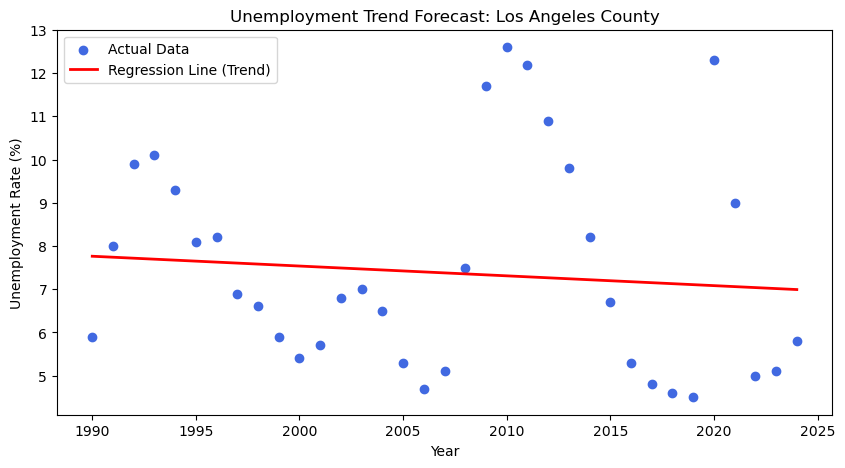

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- KM4: Modeling Execution (Example: Los Angeles County) ---

# 1. Prepare the Data
target_county = 'Los Angeles County'
model_df = df_prepared[df_prepared['Area Name'] == target_county].copy()

# Features (X) and Target (y)
X = model_df[['Year']] # Must be 2D for scikit-learn
y = model_df['Unemployment Rate']

# 2. Train/Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Initialization and Training
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediction and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- KM4 Modeling Report: {target_county} ---")
print(f"Model Slope (Annual Trend): {model.coef_[0]:.4f}")
print(f"Mean Absolute Error: {mae:.2f}%")
print(f"R-squared Score: {r2:.4f}")

# 5. Visualizing the Prediction "Trend Line"
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='royalblue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line (Trend)')
plt.title(f'Unemployment Trend Forecast: {target_county}')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

### KM 5: Evaluation

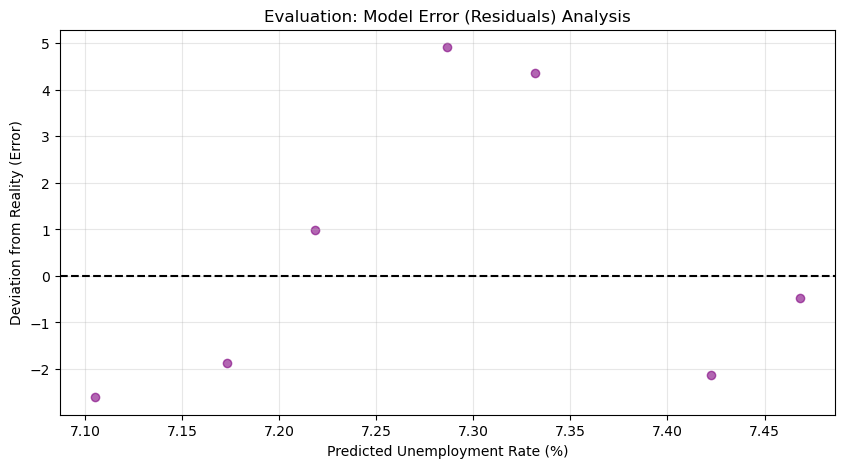

--- KM5: Model Performance Report ---
Model Accuracy (R2): -0.01
Average Error Margin (MAE): 2.48%
Conclusion: High Error detected. Model struggles with volatile economic shocks (2008/2020).


In [13]:
# --- KM5: Evaluation Execution ---

# 1. Calculate Residuals (Actual value - Predicted value)
# 'y_test' is the real data, 'y_pred' is what the model guessed
residuals = y_test - y_pred

# 2. Visualization: Residual Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Evaluation: Model Error (Residuals) Analysis')
plt.xlabel('Predicted Unemployment Rate (%)')
plt.ylabel('Deviation from Reality (Error)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Final Evaluation Summary for the Report
print("--- KM5: Model Performance Report ---")
print(f"Model Accuracy (R2): {r2:.2f}")
print(f"Average Error Margin (MAE): {mae:.2f}%")

if mae > 2:
    print("Conclusion: High Error detected. Model struggles with volatile economic shocks (2008/2020).")
else:
    print("Conclusion: Model shows a steady trend with low historical volatility.")

### KM 6: Deployment

In [15]:
import joblib

# --- KM6: Deployment Execution ---

# 1. Model Persistence (Saving the 'Brain' of the system)
# This allows us to load the trend-line logic later without recalculating
joblib.dump(model, 'ca_unemployment_model.pkl')
print("[SYSTEM] Model saved as 'ca_unemployment_model.pkl'")

# 2. Final Data Export for Dashboards
# We export the cleaned data with our 'Calculated Rate' for transparency
output_filename = 'CA_Unemployment_Clean_Final.csv'
df_prepared.to_csv(output_filename, index=False)
print(f"[SYSTEM] Cleaned data exported to '{output_filename}' for Tableau.")

# 3. Generating the Deployment "Headline"
stable_counties = county_avg.tail(5).index.tolist()
volatile_counties = county_avg.head(5).index.tolist()

print("\n--- Final Deployment Insights ---")
print(f"Top 5 High-Volatility Counties (Target for Economic Aid): {', '.join(volatile_counties)}")
print(f"Top 5 Low-Volatility Counties (Stable Baselines): {', '.join(stable_counties)}")

[SYSTEM] Model saved as 'ca_unemployment_model.pkl'
[SYSTEM] Cleaned data exported to 'CA_Unemployment_Clean_Final.csv' for Tableau.

--- Final Deployment Insights ---
Top 5 High-Volatility Counties (Target for Economic Aid): Imperial County, Colusa County, Tulare County, Merced County, Sutter County
Top 5 Low-Volatility Counties (Stable Baselines): Sonoma County, San Francisco County, Orange County, San Mateo County, Marin County


### Generate Tableau visual

In [21]:
from IPython.display import IFrame

# Replace the URL below with your actual Tableau 'Link'
tableau_url = "https://public.tableau.com/views/CaliforniaUnemploymentRateperCountyEDA/Dashboard1?:showVizHome=no&:emded=true"

# Embed the dashboard
IFrame(src=tableau_url, width=1000, height=800)



# Phase 3: Design
### 3.1 Use Case Diagram
The following diagram illustrates how the Data Analyst interacts with the CRISP-DM milestones within this system.

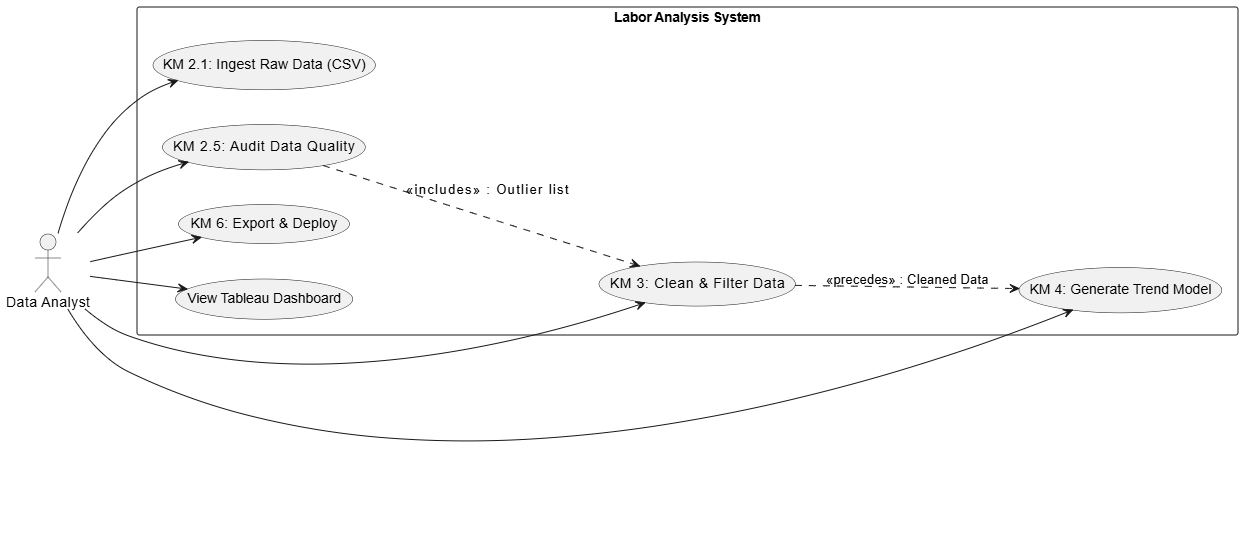

### 3.2 Class Diagram
This diagram defines the data objects (LaborRecord) and the logic (AnalysisEngine) used in the KM3 and KM4 Python cells below.

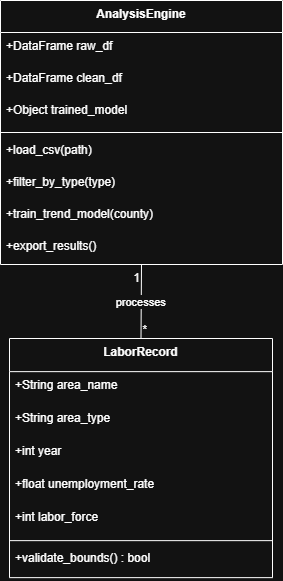

# Phase 4: Implementation

### DFD Level 0: System Context
The Level 0 DFD shows the high-level boundary of our system. 
- **Source:** CA EDD Open Data Portal (External Entity) provides the CSV.
- **Process:** Unemployment Analysis System (The Jupyter Notebook).
- **Sink:** Policy Analyst (External Entity) receives the Tableau Dashboard and Model Metrics.

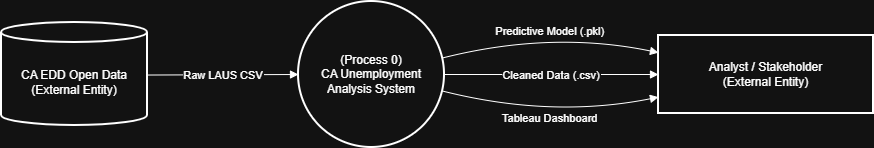

### DFD Level 1: Functional Breakdown
The Level 1 DFD breaks the system into the specific CRISP-DM processes:
1. **1.0 Data Ingestion (KM2.1):** Raw CSV is read into the environment.
2. **2.0 Validation (KM2.5):** Scans for 0/100 outliers and nulls.
3. **3.0 Preparation (KM3):** Filters by "County" and cleans the data.
4. **4.0 Analysis & Modeling (KM4/5):** Generates trends and calculates error.
5. **5.0 Visualization (KM6):** Exports to Tableau.

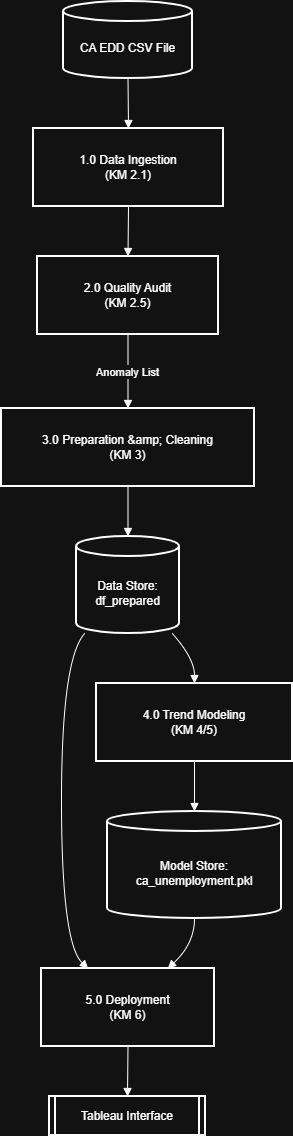

## Phase 5: Operations


### 5.1 Storage Architecture
The system employs a multi-tiered storage approach to ensure data durability and accessibility:

* **Primary Data Store:** The raw `LAUS.csv` is maintained in a read-only directory to prevent accidental data corruption.
* **Processed Data Store:** The cleaned output from **KM3** and **KM6** is exported to `CA_Unemployment_Clean_Final.csv`. This file serves as the "Source of Truth" for the Tableau visualization.
* **Model Persistence:** The Linear Regression model is serialized using the `joblib` library (saved as `.pkl`). This allows the system to load the trained trend logic for future years without needing to re-process the entire historical dataset.
* **Version Control:** All code and documentation are stored in a Git repository to track changes across the CRISP-DM lifecycle.

### 5.2 Security and Data Integrity
To protect the analysis from errors and unauthorized changes, the following safeguards are implemented:

* **Non-Destructive Processing:** The system uses a functional programming approach where the raw input is never overwritten. All cleaning and transformations are performed on copies (DataFrames) in system memory.
* **Automated Validation:** The system contains built-in range checks to identify and strip out "impossible" unemployment rates (0% and 100%) discovered during the data audit phase.
* **Access and Privacy:** * **Internal:** Access to the Jupyter environment is restricted to authorized analysts via local or token-based authentication.
    * **External:** The Tableau Public dashboard is configured to prevent viewers from downloading the raw, unaggregated workbook structure, protecting the underlying calculation logic.

## Conclusion: The "Big Picture" Narrative

### Why did we build this?
Data is only valuable if it tells a story that leads to action. We built this system to transform millions of rows of raw government employment data into a clear, visual map of California's economic history. 

### The Core Objective
While the "under the hood" work involved complex Python cleaning and statistical modeling, the goal was simple: **to identify which communities are resilient and which are vulnerable.** By automating the data audit and trend analysis, we moved from "guessing" about the economy to "seeing" it through:
1. **Consistency:** Ensuring every city and county is measured on a level playing field.
2. **Predictive Insight:** Moving beyond what happened in the past to identify underlying long-term trends.
3. **Accessibility:** Using Tableau to ensure a policy-maker doesn't need to know Python to understand the data.

### Final Takeaway
This project demonstrates that by using a structured framework (CRISP-DM), we can take a messy, real-world dataset and turn it into a reliable tool for economic forecasting and regional comparison.